# Calculate statistics of the dataset

Plot a histogram, count the total points, and calculate the mean, median, and variance. Useful for understanding the distribution of the data before funneling into an ML model and analyzing.

---

### 1. Load packages and open dataset

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
point_names = ['upstream', 'middle', 'terminus']
point_capitals = ['Upstream', 'Middle', 'Terminus']

### Plot histogram of data points
This plot displays the number of velocity data points for each year in the dataset

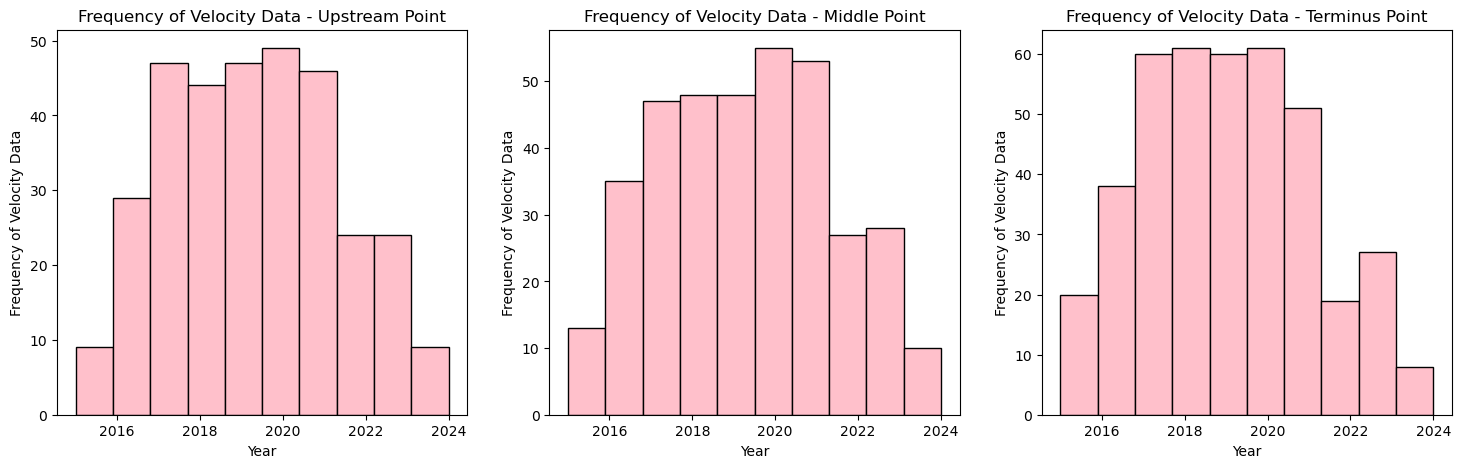

<Figure size 640x480 with 0 Axes>

In [20]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

for i, (point) in enumerate(point_names):
    data = pd.read_csv('../data/clean/' + point_names[i] + '_velocity_series_clean.csv')
    # Convert 'time' column to datetime
    data['time'] = pd.to_datetime(data['time'])

    # Aggregate the data by year
    data['year'] = data['time'].dt.year

    ax[i].set_xlabel('Year')
    ax[i].set_ylabel('Frequency of Velocity Data')
    ax[i].set_title('Frequency of Velocity Data - ' + point_capitals[i] + ' Point')

    # Create a histogram of the data
    ax[i].hist(data['year'], color='pink', edgecolor='black')
plt.show()
plt.savefig('../figures/velocity_data_point_frequency.png')

The most samples occur from 2017-2021, when Landsat-8, Sentinel-1, and Sentinel-2 overlapped.

In [23]:
for point in point_names:
    data = pd.read_csv('../data/clean/' + point + '_velocity_series_clean.csv')
    data['time'] = pd.to_datetime(data['time'])
    print(f"There are {len(data['time'])} data points in the dataset for {point.capitalize()} Point.")

There are 328 data points in the dataset for Upstream Point.
There are 364 data points in the dataset for Middle Point.
There are 405 data points in the dataset for Terminus Point.


In [24]:
for point in point_names:
    data = pd.read_csv('../data/clean/' + point + '_velocity_series_clean.csv')
    data['time'] = pd.to_datetime(data['time'])
    
    # Calculate the mean, median, and variance of the velocity data
    mean_velocity = data['VelocitySeries'].mean()
    median_velocity = data['VelocitySeries'].median()
    variance_velocity = data['VelocitySeries'].var()

    print(f"{point.capitalize()} Point:")
    print(f"Mean Velocity: {mean_velocity}")
    print(f"Median Velocity: {median_velocity}")
    print(f"Variance of Velocity: {variance_velocity}")
    print()

Upstream Point:
Mean Velocity: 566.5210793292683
Median Velocity: 568.4338150000001
Variance of Velocity: 528.0334209962659

Middle Point:
Mean Velocity: 823.867876675824
Median Velocity: 828.81975
Variance of Velocity: 2499.2483265794976

Terminus Point:
Mean Velocity: 2355.4897150617285
Median Velocity: 2298.111
Variance of Velocity: 49171.57097421155



The velocity has a high variance likely because of seasonal fluctuations increasing over the years, causing for more variation in the data due to climate warming.

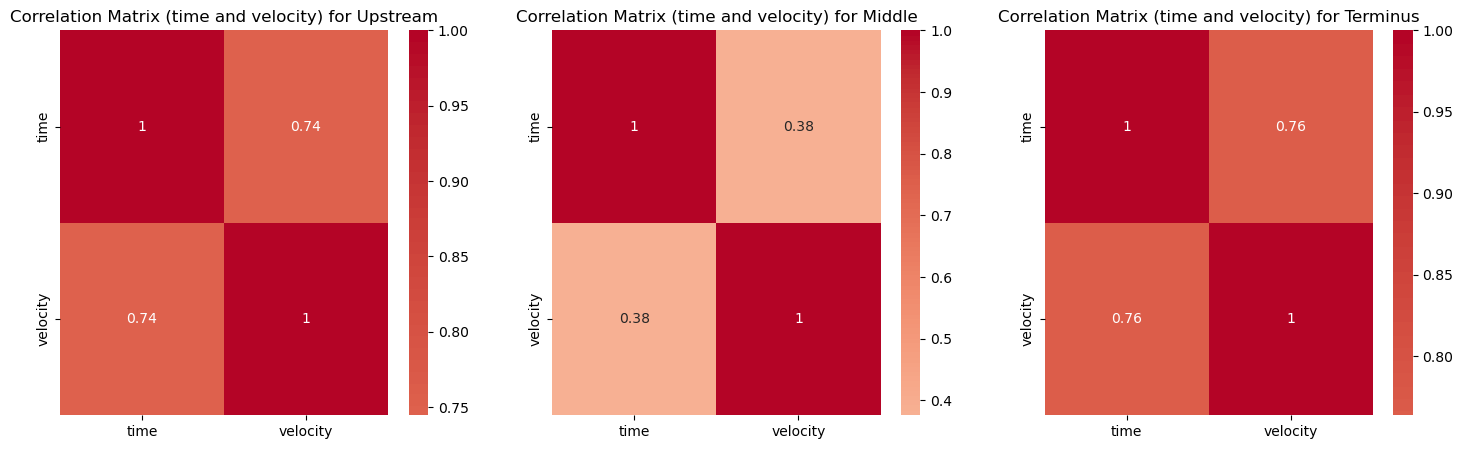

<Figure size 640x480 with 0 Axes>

In [31]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

for i, point in enumerate(point_names):
    data = pd.read_csv('../data/clean/' + point + '_velocity_series_clean.csv')
    data['time'] = pd.to_datetime(data['time'])
    data.rename(columns={'VelocitySeries': 'velocity'}, inplace=True)
    # Calculate the correlation matrix for 'time' and 'VelocitySeries'
    correlation_matrix_filtered = data[['time', 'velocity']].corr()

    # Plot the filtered correlation matrix
    sns.heatmap(correlation_matrix_filtered, annot=True, cmap='coolwarm', center=0, ax=ax[i])
    ax[i].set_title('Correlation Matrix (time and velocity) for ' + point_capitals[i])

plt.show()
plt.savefig('../figures/velocity_correlation_matrix.png')

The correlation matrix shows that there is little correlation between the velocity and a given time. This might account for some seasonal fluctuations but likely does not have the granularity to represent the correlation between, for example, summer months and velocity speedup.